In [11]:
import geopandas as gp
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
import matplotlib.pyplot as plt
import matplotlib.colors
import contextily as ctx

import util

In [44]:
# Config and Setup
CMAP = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","blue","purple"])
CMAP2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])

In [39]:
tracts = gp.read_file("data/shapefiles/local/tracts_cle.shp")
tracts["price_to_rent"] = round(tracts.MEDIAN_HOM/(tracts.MEDIAN_CON*12),1)
tracts["rent_to_price"] = round(tracts.MEDIAN_CON/(tracts.MEDIAN_HOM),4)*100
tracts = tracts[tracts.geometry.area<0.2]

tracts["geometry"] = [MultiPolygon([feature]) if type(feature) == Polygon \
    else feature for feature in tracts["geometry"]]

tracts.to_file('data/geojson/tracts.geojson', driver='GeoJSON')
tracts = tracts.to_crs(epsg=3857)

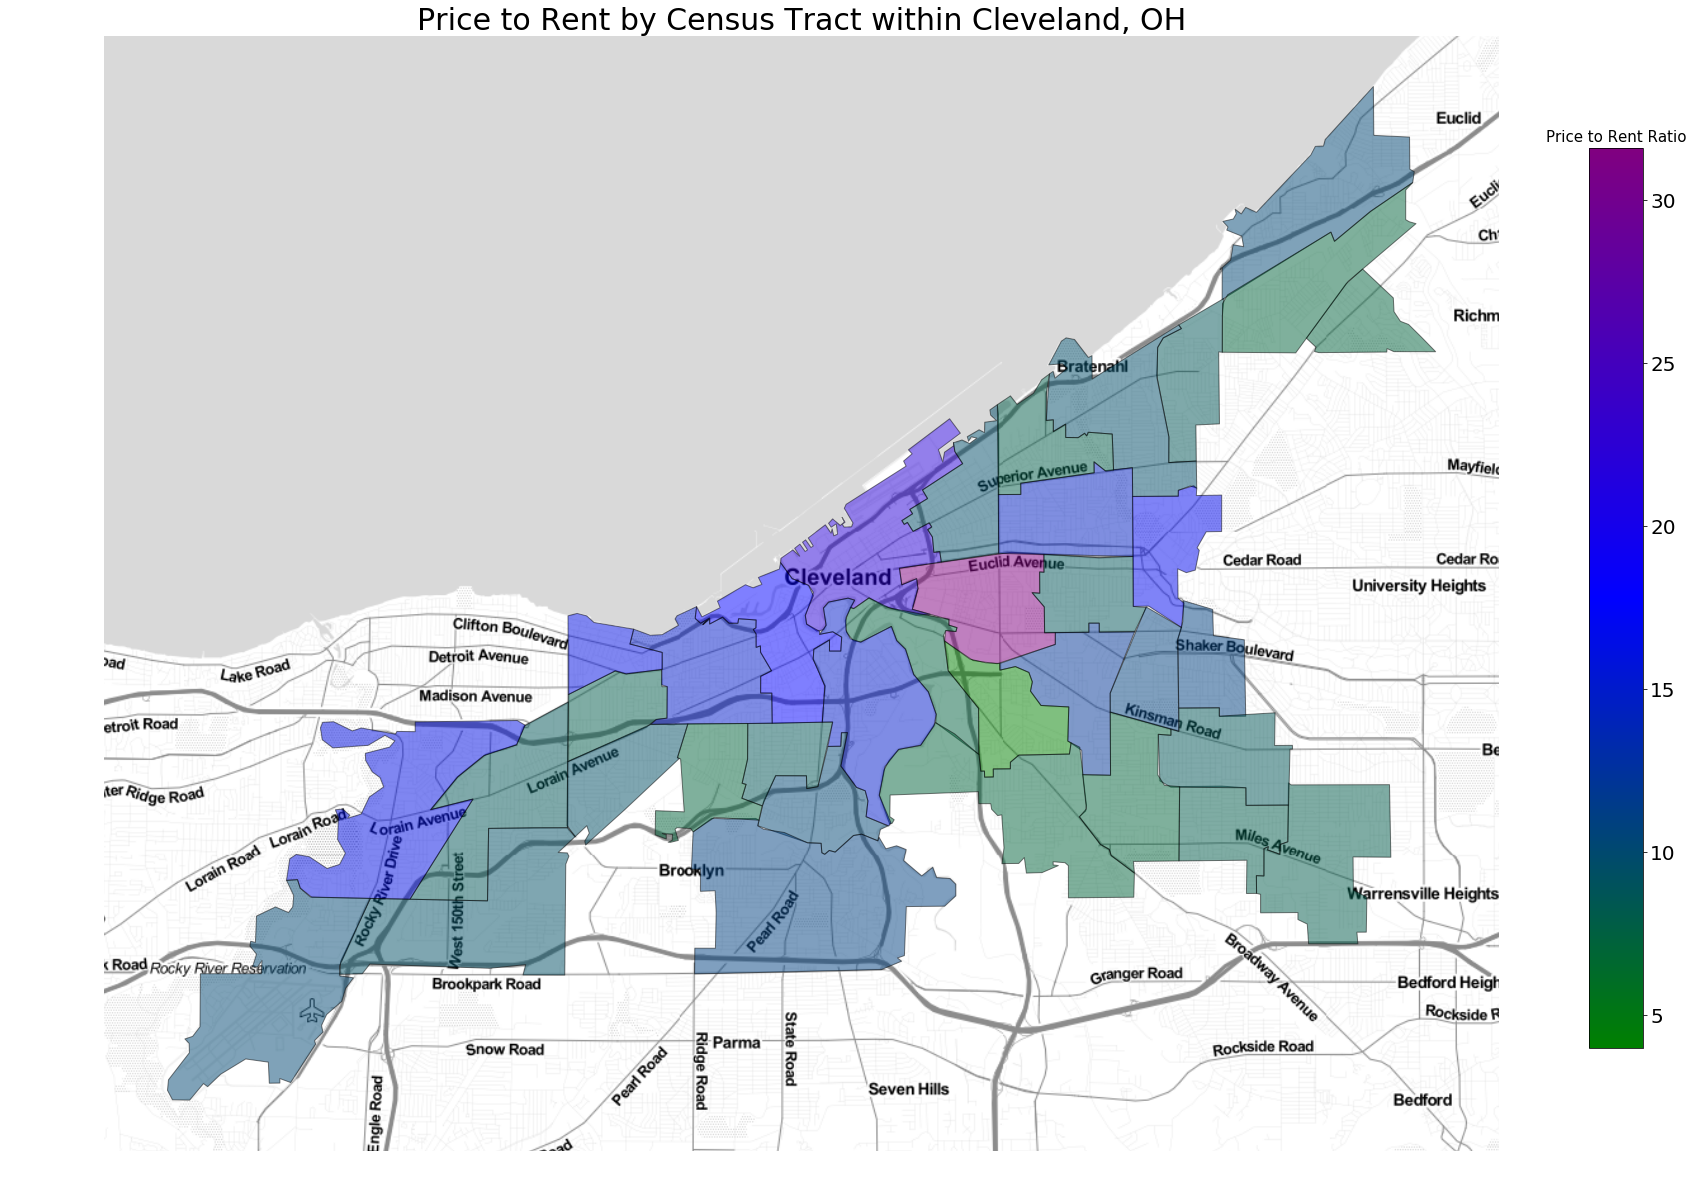

In [24]:
column = "price_to_rent"
vmin = tracts[column].min()
vmax = tracts[column].max()

ax = tracts.plot(
    column=column,
    cmap=CMAP,
    figsize=(25, 25),
    alpha=0.5,
    edgecolor='black',
    linewidth=1,
)

util.add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)

ax.set_axis_off()
fig = ax.get_figure()

cbax = fig.add_axes([0.95, 0.25, 0.03, 0.5])   
cbax.set_title("Price to Rent Ratio", fontsize= 15)
sm = plt.cm.ScalarMappable(cmap=CMAP, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax)

matplotlib.rcParams.update({'font.size': 20})
ax.set_title('Price to Rent by Census Tract within Cleveland, OH', fontdict={
    'fontsize': 30, 'fontweight': 'medium'})

plt.savefig('images/Local_Price_to_Rent_Ratio.jpg',  dpi=300, bbox_inches = "tight")
plt.show()

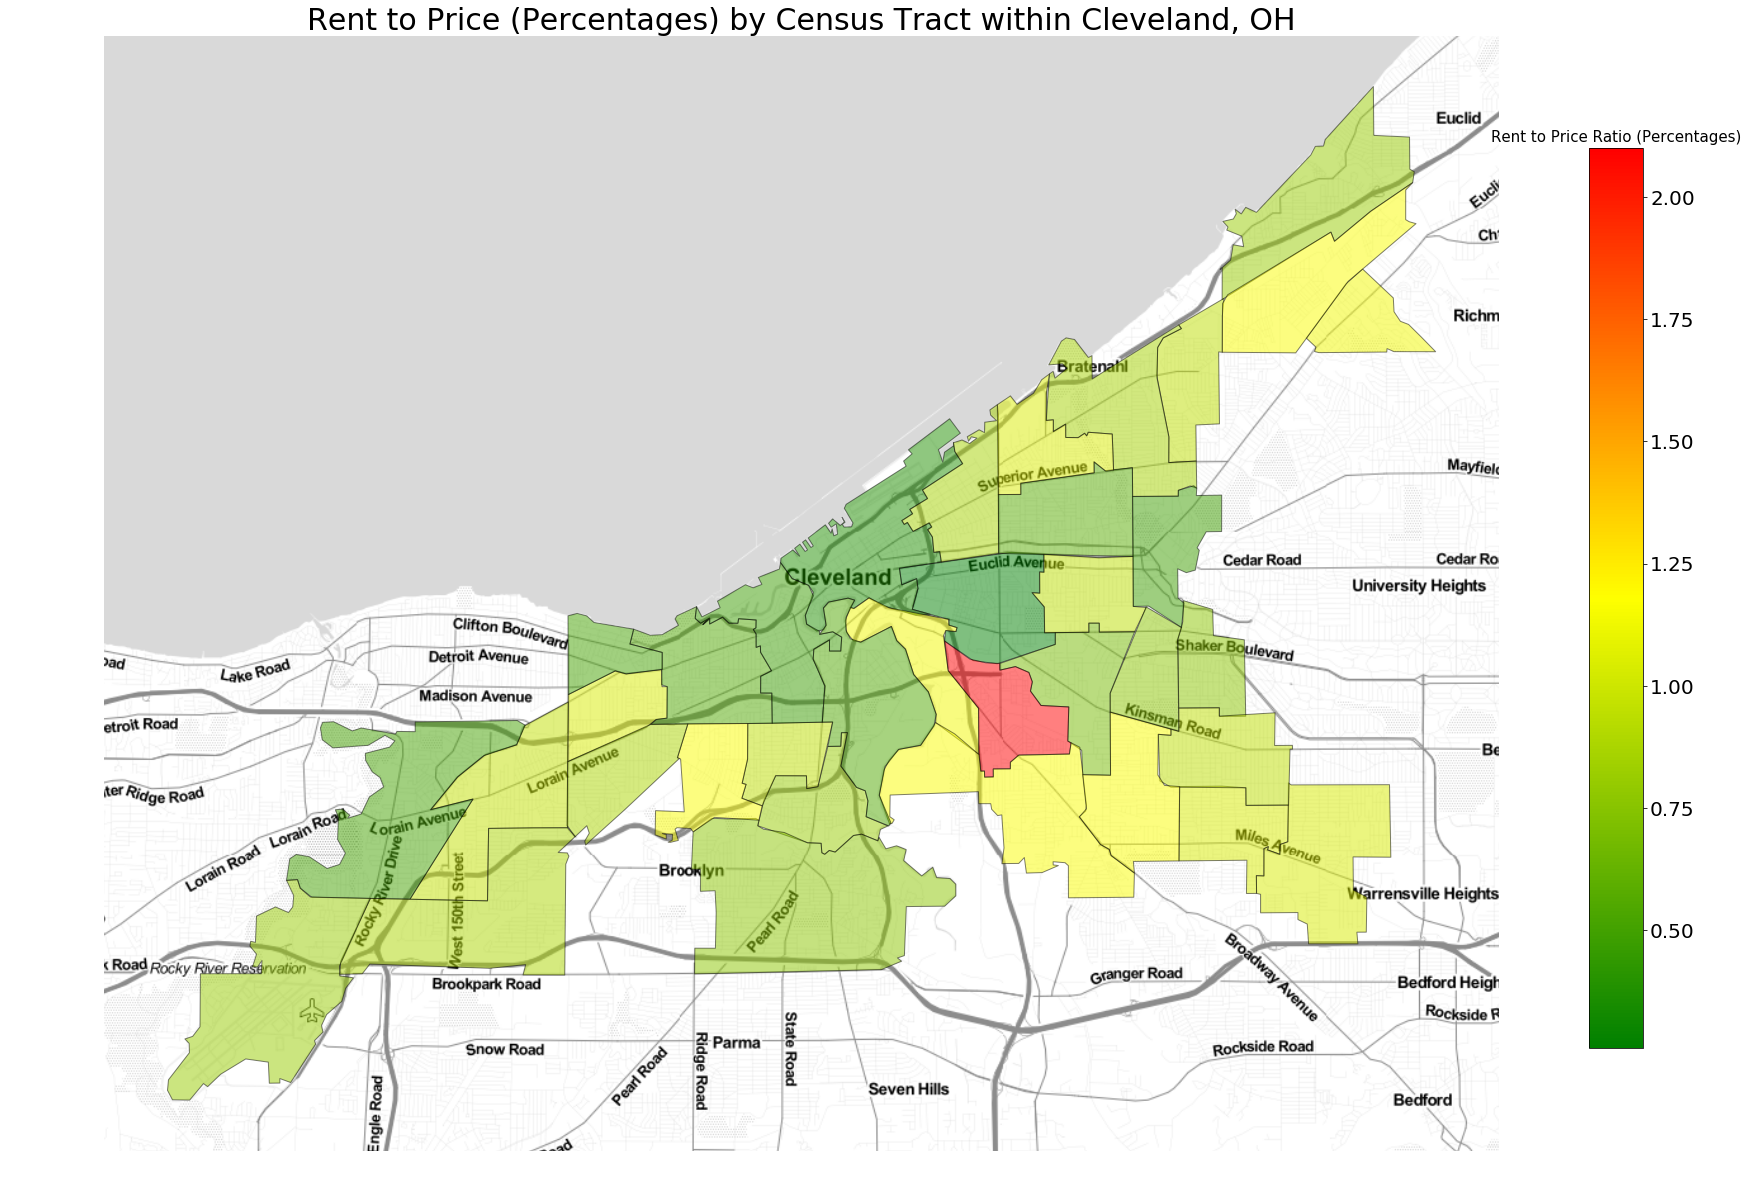

In [47]:
column = "rent_to_price"
vmin = tracts[column].min()
vmax = tracts[column].max()

ax = tracts.plot(
    column=column,
    cmap=CMAP2,
    figsize=(25, 25),
    alpha=0.5,
    edgecolor='black',
    linewidth=1,
)

util.add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)

ax.set_axis_off()
fig = ax.get_figure()

cbax = fig.add_axes([0.95, 0.25, 0.03, 0.5])   
cbax.set_title("Rent to Price Ratio (Percentages)", fontsize= 15)
sm = plt.cm.ScalarMappable(cmap=CMAP2, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax)

matplotlib.rcParams.update({'font.size': 20})
ax.set_title('Rent to Price (Percentages) by Census Tract within Cleveland, OH', fontdict={
    'fontsize': 30, 'fontweight': 'medium'})

plt.savefig('images/Local_Rent_to_Price_Ratio.jpg',  dpi=300, bbox_inches = "tight")
plt.show()

In [49]:
tracts.sort_values("price_to_rent")

,GEO_ID,NAME,TOTAL_POPU,MEDIAN_CON,MEDIAN_HOM,geometry,price_to_rent,rent_to_price
21,271019.0,"North Broadway, Cleveland, Ohio",4822,524,25000,(POLYGON ((-9089827.631074293 5083698.77991576...,4.0,2.10
32,275800.0,"Union Miles Park, Cleveland, Ohio",9416,524,44999,"(POLYGON ((-9084229.262557587 5081696.1213231,...",7.2,1.16
30,271045.0,"Stockyards, Cleveland, Ohio",6563,524,44999,(POLYGON ((-9097155.236562584 5081863.99643674...,7.2,1.16
29,271042.0,"South Collinwood, Cleveland, Ohio",10251,524,44999,(POLYGON ((-9077020.880244058 5097038.47530929...,7.2,1.16
28,271041.0,"South Broadway, Cleveland, Ohio",16480,524,44999,(POLYGON ((-9090765.720424088 5081547.26459912...,7.2,1.16
9,273654.0,"Euclid Green, Cleveland, Ohio",5233,624,54999,(POLYGON ((-9076663.210719794 5093558.27773852...,7.3,1.13
15,276390.0,"Indurstrial Valley, Cleveland, Ohio",811,424,37499,(POLYGON ((-9092743.422499359 5085360.02927303...,7.4,1.13
27,275540.0,"Saint Claire-Superior, Cleveland, Ohio",6161,474,44999,(POLYGON ((-9087988.299126212 5091906.61773215...,7.9,1.05
4,270976.0,"Corlett, Cleveland, Ohio",10805,574,54999,(POLYGON ((-9082686.597052738 5079969.70297760...,8.0,1.04
5,200246.0,"Cudell, Cleveland, Ohio",10353,574,54999,(POLYGON ((-9099635.001528738 5083493.48915338...,8.0,1.04
